<a href="https://colab.research.google.com/github/robinsonmirandaco/galaxy-m51-vision-ai/blob/main/galaxy_m51_vision_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Cargar Imagenes y convertir a scala de grises


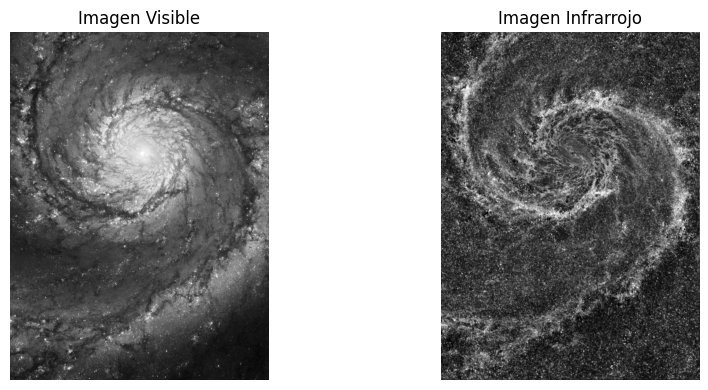

In [3]:
import cv2
import matplotlib.pyplot as plt

# Ruta a tus imágenes (ajusta si están en otro directorio)
visible_path = "m51_visible.jpg"
infrared_path = "m51_infrared.jpg"

# Cargar en escala de grises
img_visible = cv2.imread(visible_path, cv2.IMREAD_GRAYSCALE)
img_infrared = cv2.imread(infrared_path, cv2.IMREAD_GRAYSCALE)

# Mostrar ambas imágenes
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_visible, cmap='gray')
plt.title('Imagen Visible')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_infrared, cmap='gray')
plt.title('Imagen Infrarrojo')
plt.axis('off')

plt.tight_layout()
plt.show()

# 🧪 Paso 2: Redimensionar las imágenes a 256×256 píxeles

Esto es útil para facilitar el procesamiento y calcular métricas como SSIM después.

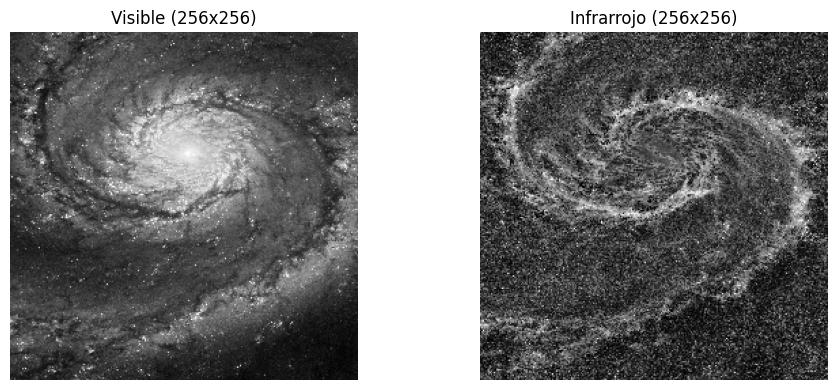

In [4]:
# Redimensionar a 256x256 usando interpolación bicúbica
img_visible_resized = cv2.resize(img_visible, (256, 256), interpolation=cv2.INTER_CUBIC)
img_infrared_resized = cv2.resize(img_infrared, (256, 256), interpolation=cv2.INTER_CUBIC)

# Mostrar imágenes redimensionadas
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_visible_resized, cmap='gray')
plt.title('Visible (256x256)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_infrared_resized, cmap='gray')
plt.title('Infrarrojo (256x256)')
plt.axis('off')

plt.tight_layout()
plt.show()


# 🧪 Paso 3: Aplicar el filtro Gaussiano a ambas imágenes

Este filtro suaviza la imagen, reduce el ruido y prepara para pasos posteriores como detección de bordes.

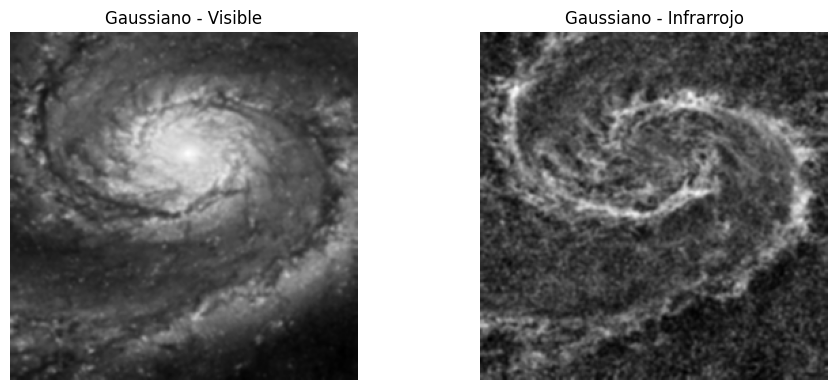

In [5]:
# Aplicar filtro Gaussiano
gaussian_visible = cv2.GaussianBlur(img_visible_resized, (5, 5), 0)
gaussian_infrared = cv2.GaussianBlur(img_infrared_resized, (5, 5), 0)

# Mostrar resultados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gaussian_visible, cmap='gray')
plt.title('Gaussiano - Visible')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_infrared, cmap='gray')
plt.title('Gaussiano - Infrarrojo')
plt.axis('off')

plt.tight_layout()
plt.show()


# 🧪 Paso 4: Aplicar el filtro Sobel para detectar bordes

Este filtro realza los contornos y transiciones de intensidad en las imágenes.

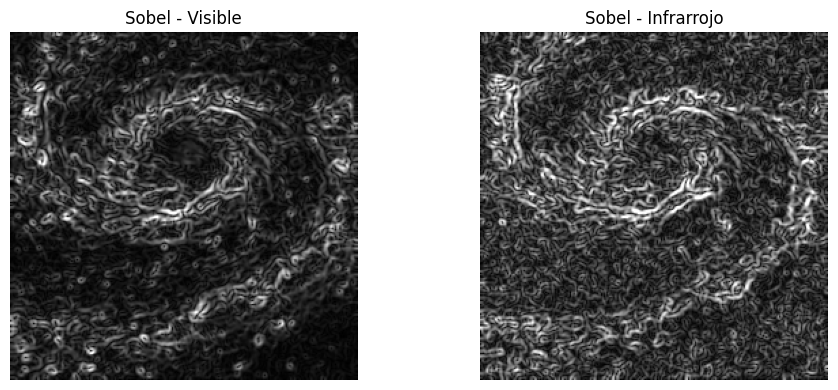

In [6]:
import numpy as np

# Sobel en dirección X e Y, luego combinación de magnitudes
sobelx_visible = cv2.Sobel(gaussian_visible, cv2.CV_64F, 1, 0, ksize=3)
sobely_visible = cv2.Sobel(gaussian_visible, cv2.CV_64F, 0, 1, ksize=3)
sobel_visible = cv2.magnitude(sobelx_visible, sobely_visible)
sobel_visible = np.uint8(np.clip(sobel_visible, 0, 255))

sobelx_infrared = cv2.Sobel(gaussian_infrared, cv2.CV_64F, 1, 0, ksize=3)
sobely_infrared = cv2.Sobel(gaussian_infrared, cv2.CV_64F, 0, 1, ksize=3)
sobel_infrared = cv2.magnitude(sobelx_infrared, sobely_infrared)
sobel_infrared = np.uint8(np.clip(sobel_infrared, 0, 255))

# Mostrar resultados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(sobel_visible, cmap='gray')
plt.title('Sobel - Visible')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_infrared, cmap='gray')
plt.title('Sobel - Infrarrojo')
plt.axis('off')

plt.tight_layout()
plt.show()

# 🧪 Paso 5: Aplicar operaciones morfológicas (apertura y cierre)

Estas operaciones ayudan a eliminar ruido fino y consolidar regiones importantes.

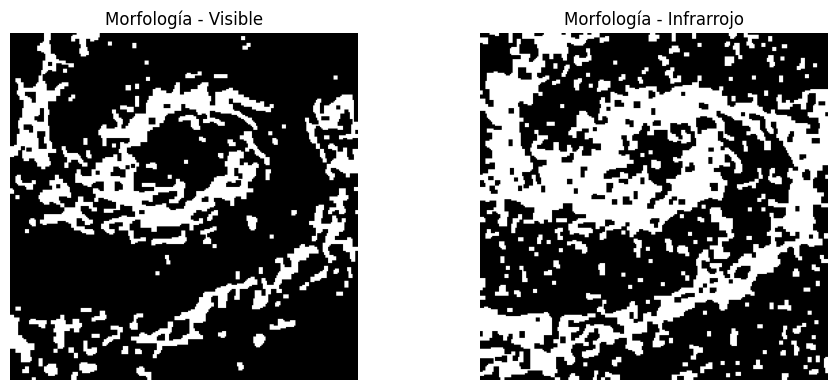

In [7]:
# Umbralizamos las imágenes de Sobel para binarizarlas
_, thresh_visible = cv2.threshold(sobel_visible, 50, 255, cv2.THRESH_BINARY)
_, thresh_infrared = cv2.threshold(sobel_infrared, 50, 255, cv2.THRESH_BINARY)

# Definir kernel morfológico
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Aplicar apertura y luego cierre
morph_visible = cv2.morphologyEx(thresh_visible, cv2.MORPH_OPEN, kernel)
morph_visible = cv2.morphologyEx(morph_visible, cv2.MORPH_CLOSE, kernel)

morph_infrared = cv2.morphologyEx(thresh_infrared, cv2.MORPH_OPEN, kernel)
morph_infrared = cv2.morphologyEx(morph_infrared, cv2.MORPH_CLOSE, kernel)

# Mostrar resultados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(morph_visible, cmap='gray')
plt.title('Morfología - Visible')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(morph_infrared, cmap='gray')
plt.title('Morfología - Infrarrojo')
plt.axis('off')

plt.tight_layout()
plt.show()

# 🖼️ Paso 6: Comparación visual completa por espectro

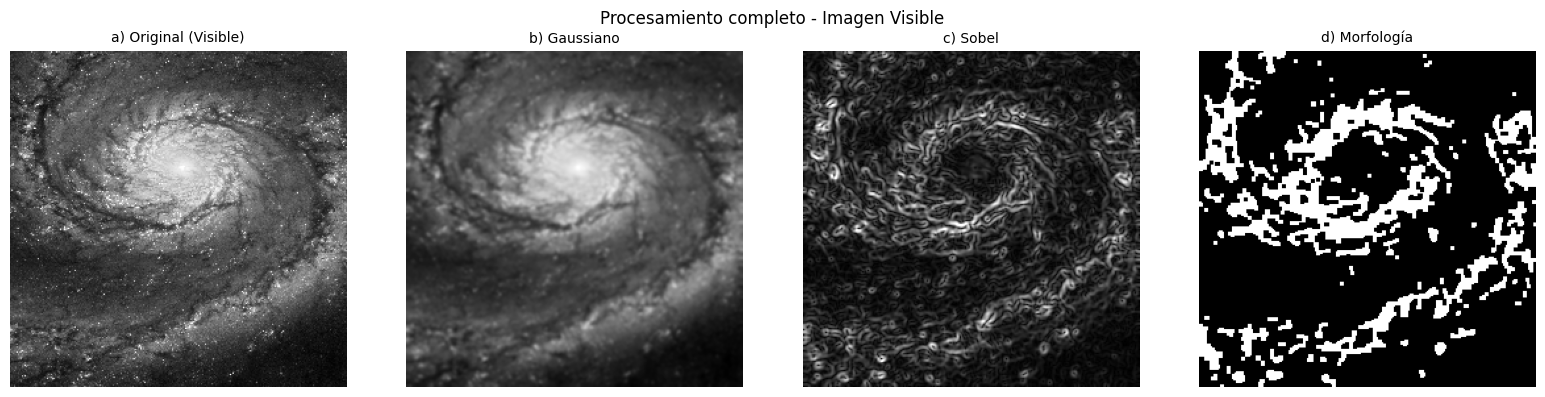

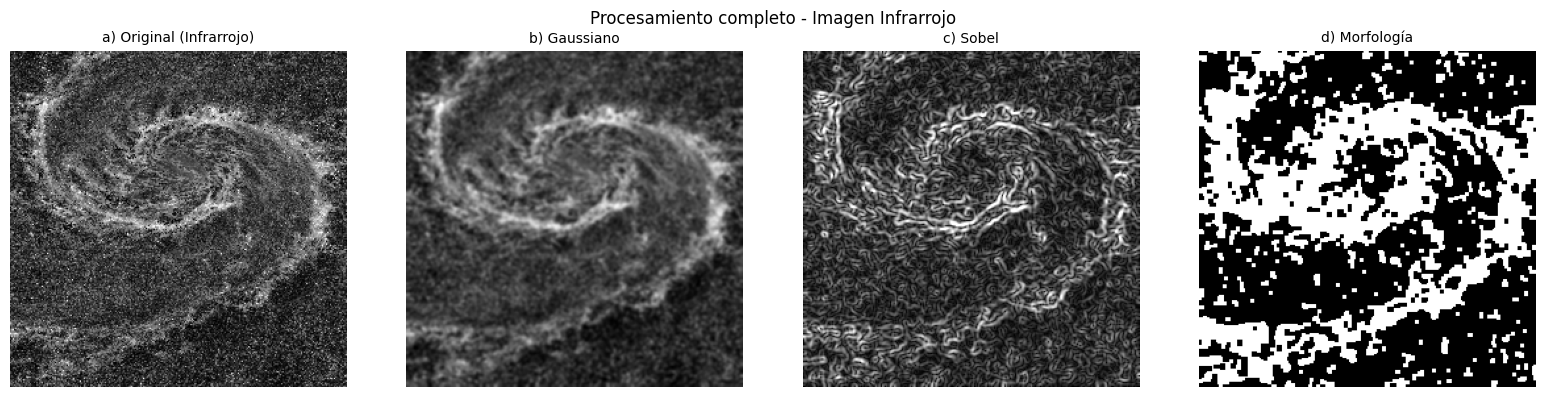

In [8]:
# Crear collage para imagen visible
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
titles = ['a) Original (Visible)', 'b) Gaussiano', 'c) Sobel', 'd) Morfología']
images = [img_visible_resized, gaussian_visible, sobel_visible, morph_visible]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=10)
    ax.axis('off')

fig.suptitle('Procesamiento completo - Imagen Visible', fontsize=12)
plt.tight_layout()
plt.show()

# Crear collage para imagen infrarroja
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
titles_ir = ['a) Original (Infrarrojo)', 'b) Gaussiano', 'c) Sobel', 'd) Morfología']
images_ir = [img_infrared_resized, gaussian_infrared, sobel_infrared, morph_infrared]

for ax, img, title in zip(axes, images_ir, titles_ir):
    ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=10)
    ax.axis('off')

fig.suptitle('Procesamiento completo - Imagen Infrarrojo', fontsize=12)
plt.tight_layout()
plt.show()

# 🧪 Paso 7: Calcular SSIM (Índice de Similitud Estructural)

Esto compara la imagen original (256×256) con cada versión procesada, para medir cuánto se conserva la estructura.

In [9]:
pip install scikit-image

In [10]:
from skimage.metrics import structural_similarity as ssim

# Función para redondear y mostrar SSIM
def show_ssim(original, processed, name=""):
    value = ssim(original, processed)
    print(f"SSIM ({name}): {value:.4f}")
    return value

print("== SSIM para imagen visible ==")
ssim_gauss_visible = show_ssim(img_visible_resized, gaussian_visible, "Gaussiano - Visible")
ssim_sobel_visible = show_ssim(img_visible_resized, sobel_visible, "Sobel - Visible")
ssim_morph_visible = show_ssim(img_visible_resized, morph_visible, "Morfología - Visible")

print("\n== SSIM para imagen infrarroja ==")
ssim_gauss_infrared = show_ssim(img_infrared_resized, gaussian_infrared, "Gaussiano - Infrarrojo")
ssim_sobel_infrared = show_ssim(img_infrared_resized, sobel_infrared, "Sobel - Infrarrojo")
ssim_morph_infrared = show_ssim(img_infrared_resized, morph_infrared, "Morfología - Infrarrojo")

== SSIM para imagen visible ==
SSIM (Gaussiano - Visible): 0.6175
SSIM (Sobel - Visible): 0.1123
SSIM (Morfología - Visible): 0.0157

== SSIM para imagen infrarroja ==
SSIM (Gaussiano - Infrarrojo): 0.4354
SSIM (Sobel - Infrarrojo): 0.0462
SSIM (Morfología - Infrarrojo): 0.0268
